In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

In [2]:
class SmartGridNode:
    def __init__(self, node_id):
        self.node_id = node_id
        self.public_key = self.generate_public_key()
        self.private_key = self.generate_private_key()
        
    def generate_public_key(self):
        # 模拟公钥生成
        return f'PublicKey_{self.node_id}'
    
    def generate_private_key(self):
        # 模拟私钥生成
        return f'PrivateKey_{self.node_id}'
    
    def encrypt_data(self, data, receiver_public_key):
        # 模拟加密操作
        encrypted_data = f'Encrypted({data})_with_{receiver_public_key}'
        return encrypted_data
    
    def decrypt_data(self, encrypted_data):
        # 模拟解密操作
        decrypted_data = encrypted_data.split('_with_')[0].replace('Encrypted(', '').replace(')', '')
        return decrypted_data
    
    def sign_data(self, data):
        # 模拟签名操作
        signature = f'Signature_of_{data}_by_{self.node_id}'
        return signature
    
    def verify_signature(self, data, signature, sender_id):
        # 模拟签名验证
        expected_signature = f'Signature_of_{data}_by_{sender_id}'
        return signature == expected_signature

In [3]:
# 创建智能电网节点
nodes = {}
for i in range(1, 6):
    nodes[i] = SmartGridNode(i)

# 创建网络拓扑
G = nx.Graph()
G.add_nodes_from(nodes.keys())
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)]
G.add_edges_from(edges)

In [4]:
# 定义性能指标列表
throughputs = []
latencies = []
computational_overheads = []

# 模拟节点 1 向节点 3 发送数据
sender = nodes[1]
receiver = nodes[3]
data = 'PowerData'

# 记录开始时间
start_time = time.time()

# 加密数据
encrypt_start = time.time()
encrypted_data = sender.encrypt_data(data, receiver.public_key)
encrypt_end = time.time()
encrypt_time = encrypt_end - encrypt_start

# 签名数据
sign_start = time.time()
signature = sender.sign_data(data)
sign_end = time.time()
sign_time = sign_end - sign_start

# 模拟传输时间
transmit_start = time.time()
time.sleep(0.01)  # 假设传输延迟为 0.01 秒
transmit_end = time.time()
transmit_time = transmit_end - transmit_start

# 解密数据
decrypt_start = time.time()
decrypted_data = receiver.decrypt_data(encrypted_data)
decrypt_end = time.time()
decrypt_time = decrypt_end - decrypt_start

# 验证签名
verify_start = time.time()
is_valid = receiver.verify_signature(decrypted_data, signature, sender.node_id)
verify_end = time.time()
verify_time = verify_end - verify_start

# 记录结束时间
end_time = time.time()

# 计算性能指标
total_time = end_time - start_time
latencies.append(total_time)
throughputs.append(len(data) / total_time)
computational_overheads.append(encrypt_time + decrypt_time + sign_time + verify_time)

# 输出结果
print(f'数据传输完成，验证结果：{is_valid}')
print(f'总耗时：{total_time:.6f} 秒')
print(f'吞吐量：{throughputs[-1]:.6f} 字符/秒')
print(f'计算开销：{computational_overheads[-1]:.6f} 秒')

数据传输完成，验证结果：True
总耗时：0.036255 秒
吞吐量：248.240792 字符/秒
计算开销：0.000976 秒


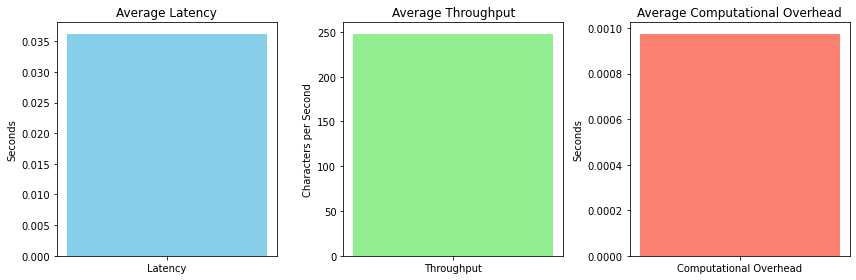

In [5]:
# 绘制性能指标图表
plt.figure(figsize=(12, 4))

# 延迟
plt.subplot(1, 3, 1)
plt.bar(['Latency'], [np.mean(latencies)], color='skyblue')
plt.ylabel('Seconds')
plt.title('Average Latency')

# 吞吐量
plt.subplot(1, 3, 2)
plt.bar(['Throughput'], [np.mean(throughputs)], color='lightgreen')
plt.ylabel('Characters per Second')
plt.title('Average Throughput')

# 计算开销
plt.subplot(1, 3, 3)
plt.bar(['Computational Overhead'], [np.mean(computational_overheads)], color='salmon')
plt.ylabel('Seconds')
plt.title('Average Computational Overhead')

plt.tight_layout()
plt.show()

In [8]:
# 定义性能指标列表
throughputs = []
latencies = []
computational_overheads = []

# 实验次数
num_experiments = 500

for _ in range(num_experiments):
    # 模拟节点 1 向节点 3 发送数据
    sender = nodes[1]
    receiver = nodes[3]
    data = 'PowerData'
    
    # 记录开始时间
    start_time = time.time()
    
    # 加密数据
    encrypt_start = time.time()
    encrypted_data = sender.encrypt_data(data, receiver.public_key)
    encrypt_end = time.time()
    encrypt_time = encrypt_end - encrypt_start
    
    # 签名数据
    sign_start = time.time()
    signature = sender.sign_data(data)
    sign_end = time.time()
    sign_time = sign_end - sign_start
    
    # 模拟传输时间
    transmit_start = time.time()
    time.sleep(np.random.uniform(0.005, 0.015))  # 随机传输延迟在 5ms 到 15ms 之间
    transmit_end = time.time()
    transmit_time = transmit_end - transmit_start
    
    # 解密数据
    decrypt_start = time.time()
    decrypted_data = receiver.decrypt_data(encrypted_data)
    decrypt_end = time.time()
    decrypt_time = decrypt_end - decrypt_start
    
    # 验证签名
    verify_start = time.time()
    is_valid = receiver.verify_signature(decrypted_data, signature, sender.node_id)
    verify_end = time.time()
    verify_time = verify_end - verify_start
    
    # 记录结束时间
    end_time = time.time()
    
    # 计算性能指标
    total_time = end_time - start_time
    latencies.append(total_time)
    throughputs.append(len(data) / total_time)
    computational_overheads.append(encrypt_time + decrypt_time + sign_time + verify_time)


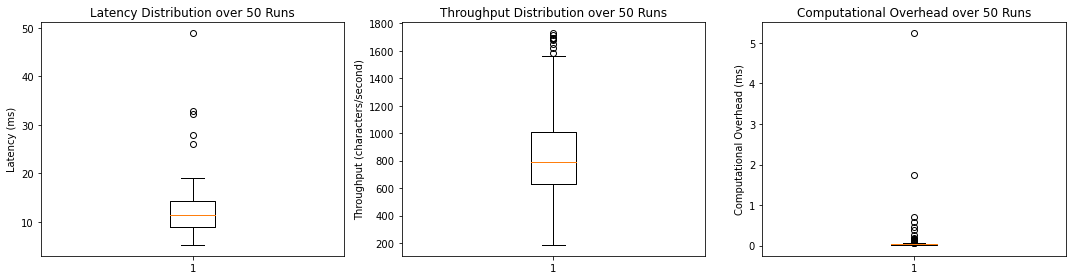

In [9]:
# 将性能指标转换为 numpy 数组
latencies = np.array(latencies)
throughputs = np.array(throughputs)
computational_overheads = np.array(computational_overheads)

# 绘制延迟的箱线图
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.boxplot(latencies * 1000)  # 转换为毫秒
plt.ylabel('Latency (ms)')
plt.title('Latency Distribution over 50 Runs')

# 绘制吞吐量的箱线图
plt.subplot(1, 3, 2)
plt.boxplot(throughputs)
plt.ylabel('Throughput (characters/second)')
plt.title('Throughput Distribution over 50 Runs')

# 绘制计算开销的箱线图
plt.subplot(1, 3, 3)
plt.boxplot(computational_overheads * 1000)  # 转换为毫秒
plt.ylabel('Computational Overhead (ms)')
plt.title('Computational Overhead over 50 Runs')

plt.tight_layout()
plt.show()
